<a href="https://colab.research.google.com/github/IsabelleNascimento/Analise-de-Importacoes-Brasil-Estatistica-e-ML/blob/main/Analise_Importa%C3%A7%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd

In [7]:
import seaborn as sns

In [8]:
import matplotlib.pyplot as plt

In [9]:
import numpy as np

In [10]:
df_import = pd.read_csv('/content/bq_importacao.csv')

In [11]:
df_import.head(100)

,ano,mes,id_sh4,id_pais,sigla_pais_iso3,sigla_uf,id_municipio,peso_liquido_kg,valor_fob_dolar,ID_VIA,id_urf,quantidade_estatistica,peso_liquido_kg_1,valor_fob_dolar_1,valor_frete,valor_seguro
0,2020,12,101,249,USA,SP,3500105,1200,21300,4,817700,2000,1,4700,37,0
1,2020,12,2106,249,USA,SP,3500303,50,2829,4,817700,2000,1,4700,37,0
2,2020,12,3907,249,USA,SP,3500303,40796,89758,4,817700,2000,1,4700,37,0
3,2020,12,1302,249,USA,SP,3500303,250,17600,4,817700,2000,1,4700,37,0
4,2020,12,2827,249,USA,SP,3500303,63488,154100,4,817700,2000,1,4700,37,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2020,12,3923,249,USA,SP,3502101,1157,25795,4,817700,2000,1,4700,37,0
96,2020,12,3903,249,USA,SP,3502754,1000,7900,4,817700,2000,1,4700,37,0
97,2020,12,2905,249,USA,SP,3502754,108000,117038,4,817700,2000,1,4700,37,0
98,2020,12,2825,249,USA,SP,3502754,408,212,4,817700,2000,1,4700,37,0


In [12]:
df_import.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58441 entries, 0 to 58440
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   ano                     58441 non-null  int64 
 1   mes                     58441 non-null  int64 
 2   id_sh4                  58441 non-null  int64 
 3   id_pais                 58441 non-null  int64 
 4   sigla_pais_iso3         58441 non-null  object
 5   sigla_uf                58441 non-null  object
 6   id_municipio            58441 non-null  int64 
 7   peso_liquido_kg         58441 non-null  int64 
 8   valor_fob_dolar         58441 non-null  int64 
 9   ID_VIA                  58441 non-null  int64 
 10  id_urf                  58441 non-null  int64 
 11  quantidade_estatistica  58441 non-null  int64 
 12  peso_liquido_kg_1       58441 non-null  int64 
 13  valor_fob_dolar_1       58441 non-null  int64 
 14  valor_frete             58441 non-null  int64 
 15  va

In [13]:
df_import[['valor_fob_dolar','valor_fob_dolar_1']].describe()

,valor_fob_dolar,valor_fob_dolar_1
count,5.844100e+04,58441.000000
mean,9.636045e+04,16022.354991
std,1.122819e+06,28891.509685
min,0.000000e+00,23.000000
25%,6.240000e+02,1053.000000
50%,4.342000e+03,3580.000000
75%,2.777800e+04,10789.000000
max,1.280093e+08,140856.000000


In [14]:
df_import['quantidade_estatistica'].describe()

,quantidade_estatistica
count,58441.000000
mean,2036.039065
std,4498.738718
min,0.000000
25%,260.000000
50%,804.000000
75%,2000.000000
max,33370.000000


In [15]:
df_import[['valor_seguro']].describe()

,valor_seguro
count,58441.000000
mean,41.016598
std,129.771052
min,0.000000
25%,0.000000
50%,0.000000
75%,23.000000
max,670.000000


In [16]:
#removendo colunas
df_import.drop(columns=['id_sh4','id_pais','id_urf'])

,ano,mes,sigla_pais_iso3,sigla_uf,id_municipio,peso_liquido_kg,valor_fob_dolar,ID_VIA,quantidade_estatistica,peso_liquido_kg_1,valor_fob_dolar_1,valor_frete,valor_seguro
0,2020,12,USA,SP,3500105,1200,21300,4,2000,1,4700,37,0
1,2020,12,USA,SP,3500303,50,2829,4,2000,1,4700,37,0
2,2020,12,USA,SP,3500303,40796,89758,4,2000,1,4700,37,0
3,2020,12,USA,SP,3500303,250,17600,4,2000,1,4700,37,0
4,2020,12,USA,SP,3500303,63488,154100,4,2000,1,4700,37,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
58436,2019,8,IND,SP,3557006,4684,48751,4,23392,5,7401,394,670
58437,2019,10,IND,SP,3557006,75,1002,4,1640,0,248,39,0
58438,2019,8,IND,SP,3557006,90,800,4,23392,5,7401,394,670
58439,2019,10,IND,SP,3557006,470,3488,4,1640,0,248,39,0


In [17]:
#excluindo coluna
df_import = df_import.drop(columns=['peso_liquido_kg','valor_fob_dolar'])


In [18]:
#renomeando
df_import = df_import.rename(columns={
    'peso_liquido_kg_1': 'peso_liquido_kg',
    'valor_fob_dolar_1': 'valor_fob_dolar'
})

In [19]:
df_import.head(100)

,ano,mes,id_sh4,id_pais,sigla_pais_iso3,sigla_uf,id_municipio,ID_VIA,id_urf,quantidade_estatistica,peso_liquido_kg,valor_fob_dolar,valor_frete,valor_seguro
0,2020,12,101,249,USA,SP,3500105,4,817700,2000,1,4700,37,0
1,2020,12,2106,249,USA,SP,3500303,4,817700,2000,1,4700,37,0
2,2020,12,3907,249,USA,SP,3500303,4,817700,2000,1,4700,37,0
3,2020,12,1302,249,USA,SP,3500303,4,817700,2000,1,4700,37,0
4,2020,12,2827,249,USA,SP,3500303,4,817700,2000,1,4700,37,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2020,12,3923,249,USA,SP,3502101,4,817700,2000,1,4700,37,0
96,2020,12,3903,249,USA,SP,3502754,4,817700,2000,1,4700,37,0
97,2020,12,2905,249,USA,SP,3502754,4,817700,2000,1,4700,37,0
98,2020,12,2825,249,USA,SP,3502754,4,817700,2000,1,4700,37,0


In [20]:
df_import[['peso_liquido_kg', 'valor_fob_dolar', 'valor_frete', 'valor_seguro']].describe()

,peso_liquido_kg,valor_fob_dolar,valor_frete,valor_seguro
count,58441.000000,58441.000000,58441.000000,58441.000000
mean,0.475693,16022.354991,171.836194,41.016598
std,1.090292,28891.509685,213.394203,129.771052
min,0.000000,23.000000,0.000000,0.000000
25%,0.000000,1053.000000,13.000000,0.000000
50%,0.000000,3580.000000,65.000000,0.000000
75%,1.000000,10789.000000,346.000000,23.000000
max,7.000000,140856.000000,1007.000000,670.000000


In [21]:
#removendo registros com peso zero
df_import = df_import[df_import['peso_liquido_kg'] > 0]

In [22]:
df_import['preco_unitario_usd_kg'] = df_import['valor_fob_dolar'] / df_import['peso_liquido_kg']

In [23]:
#Verificando valores duplicados
df_import.duplicated(subset=['peso_liquido_kg', 'valor_fob_dolar', 'valor_frete', 'valor_seguro']).sum()

np.int64(15631)

In [24]:
#Padrões repetidos
df_import.groupby(['peso_liquido_kg', 'valor_fob_dolar', 'valor_frete', 'valor_seguro']).size().sort_values(ascending=False).head(10)

peso_liquido_kg  valor_fob_dolar  valor_frete  valor_seguro
1                4700             37           0               7150
5                7401             394          670             1821
1                1053             235          165             1740
3                1004             102          0               1300
1                55443            315          0                934
                 393              7            0                553
3                700              13           0                518
1                84445            146          75               230
                 122764           287          166              222
                 109122           153          148              213
dtype: int64

In [25]:
# Adicionar coluna de frequência direto no df_import
df_import['freq'] = df_import.groupby(
    ['peso_liquido_kg', 'valor_fob_dolar', 'valor_frete', 'valor_seguro']
)['peso_liquido_kg'].transform('count')

# Filtrar registros que aparecem até 50 vezes
df_filtrado = df_import[df_import['freq'] <= 1000].drop(columns='freq')

In [26]:
df_filtrado[['peso_liquido_kg', 'valor_fob_dolar', 'valor_frete', 'valor_seguro']].describe()

,peso_liquido_kg,valor_fob_dolar,valor_frete,valor_seguro
count,3636.000000,3636.000000,3636.000000,3636.000000
mean,1.624037,42787.456271,228.077833,41.906766
std,1.386619,38421.143201,195.811494,63.633181
min,1.000000,306.000000,0.000000,0.000000
25%,1.000000,700.000000,13.000000,0.000000
50%,1.000000,33634.000000,287.000000,0.000000
75%,1.000000,55443.000000,315.000000,80.000000
max,7.000000,122764.000000,590.000000,180.000000


In [27]:
df_filtrado['preco_unitario_usd_kg'] = df_filtrado['valor_fob_dolar'] / df_filtrado['peso_liquido_kg']
df_filtrado['preco_unitario_usd_kg'].describe()

,preco_unitario_usd_kg
count,3636.000000
mean,41581.043618
std,39215.163226
min,233.333333
25%,393.000000
50%,33634.000000
75%,55443.000000
max,122764.000000


In [28]:
df_filtrado['preco_unitario_usd_kg'] = df_filtrado['valor_fob_dolar'] / df_filtrado['peso_liquido_kg']
df_filtrado['preco_unitario_usd_kg'].describe()

,preco_unitario_usd_kg
count,3636.000000
mean,41581.043618
std,39215.163226
min,233.333333
25%,393.000000
50%,33634.000000
75%,55443.000000
max,122764.000000


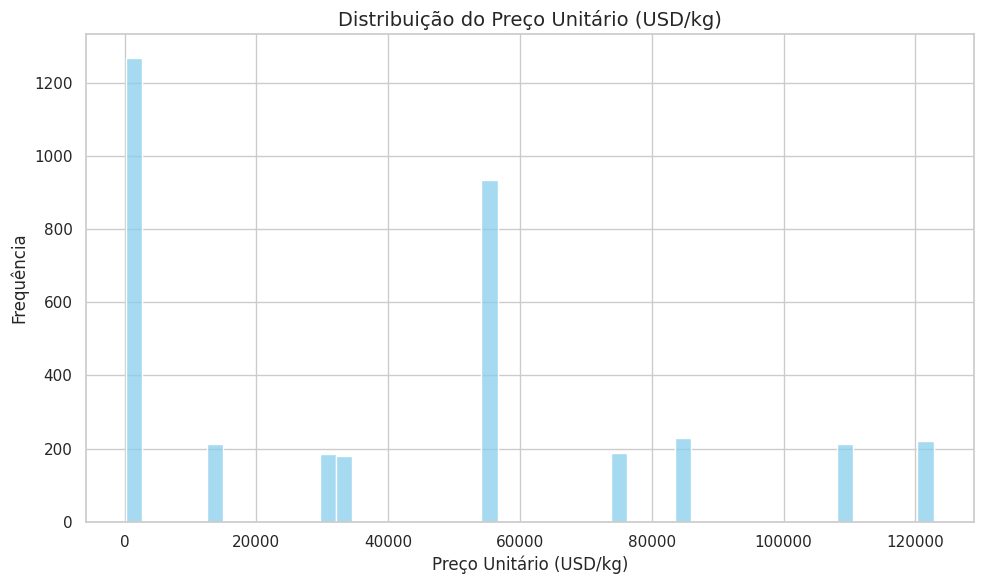

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

#histograma
plt.figure(figsize=(10, 6))
sns.histplot(df_filtrado['preco_unitario_usd_kg'], bins=50, color="skyblue")

plt.title("Distribuição do Preço Unitário (USD/kg)", fontsize=14)
plt.xlabel("Preço Unitário (USD/kg)")
plt.ylabel("Frequência")


plt.tight_layout()
plt.show()

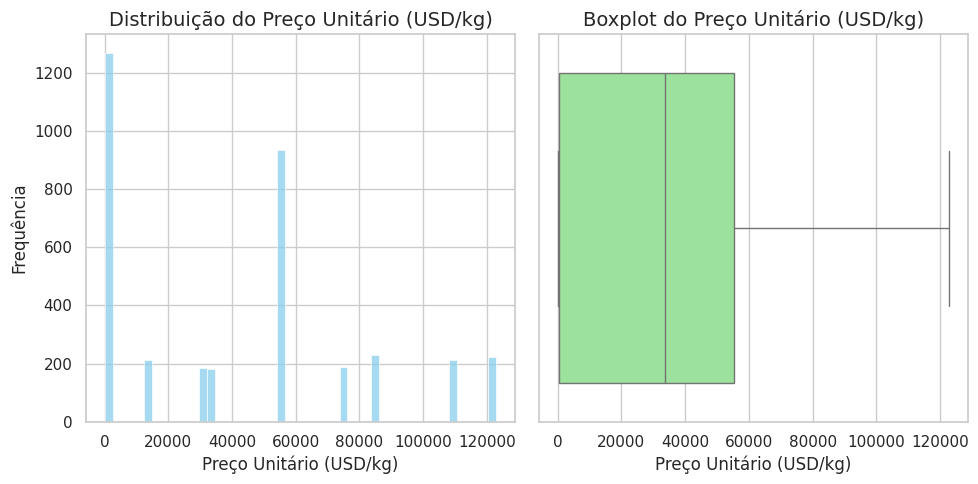

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

#Histograma
sns.histplot(df_filtrado['preco_unitario_usd_kg'], bins=50, kde=False, ax=axes[0], color="skyblue")
axes[0].set_title("Distribuição do Preço Unitário (USD/kg)", fontsize=14)
axes[0].set_xlabel("Preço Unitário (USD/kg)")
axes[0].set_ylabel("Frequência")

#Boxplot
sns.boxplot(x=df_filtrado['preco_unitario_usd_kg'], ax=axes[1], color="lightgreen")
axes[1].set_title("Boxplot do Preço Unitário (USD/kg)", fontsize=14)
axes[1].set_xlabel("Preço Unitário (USD/kg)")

plt.tight_layout()
plt.show()

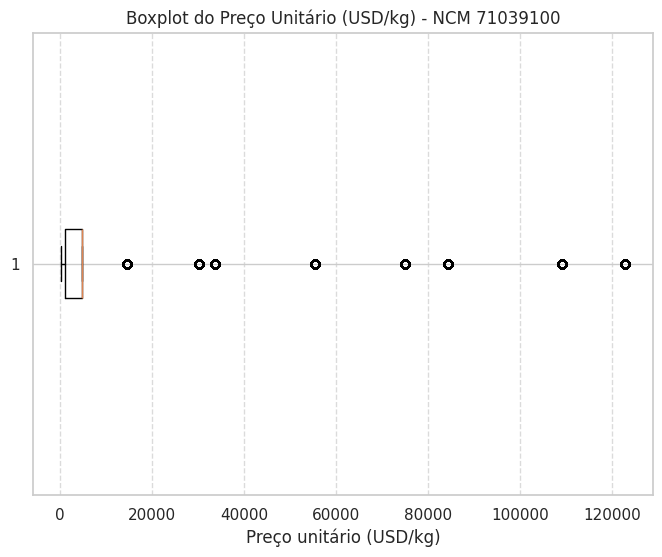

In [31]:
import matplotlib.pyplot as plt

# Boxplot do preço unitário
plt.figure(figsize=(8,6))
plt.boxplot(df_import['preco_unitario_usd_kg'].dropna(), vert=False)

plt.title('Boxplot do Preço Unitário (USD/kg) - NCM 71039100')
plt.xlabel('Preço unitário (USD/kg)')
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.show()


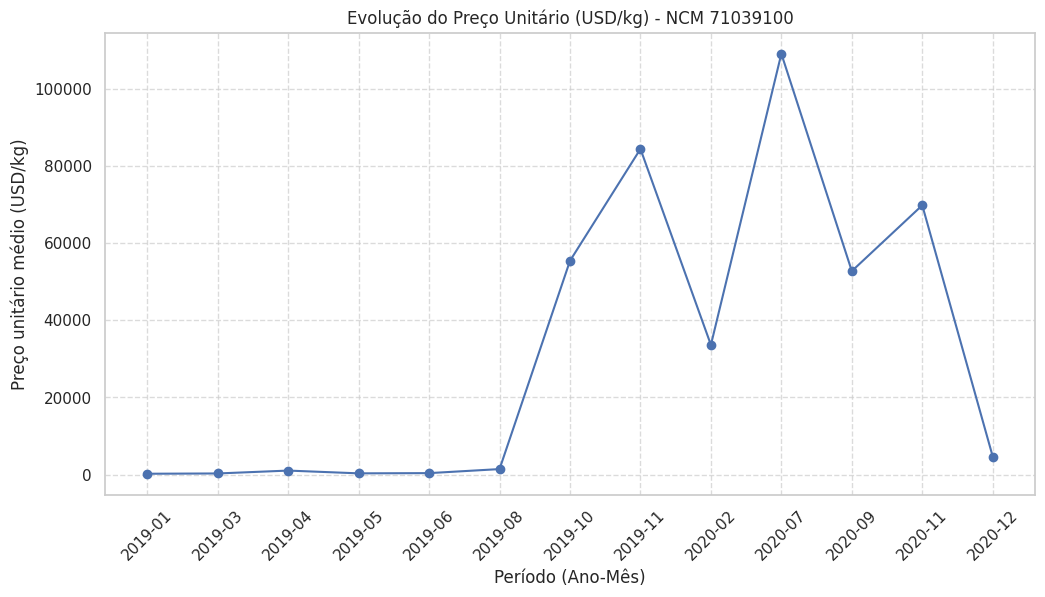

In [32]:
import matplotlib.pyplot as plt

# Agrupar por ano e mês, calculando a média do preço unitário
df_temporal = df_import.groupby(['ano','mes'])['preco_unitario_usd_kg'].mean().reset_index()

# Criar uma coluna de período (ano-mês) para facilitar o gráfico
df_temporal['periodo'] = df_temporal['ano'].astype(str) + '-' + df_temporal['mes'].astype(str).str.zfill(2)

# Plotar a evolução temporal
plt.figure(figsize=(12,6))
plt.plot(df_temporal['periodo'], df_temporal['preco_unitario_usd_kg'], marker='o', linestyle='-')

plt.title('Evolução do Preço Unitário (USD/kg) - NCM 71039100')
plt.xlabel('Período (Ano-Mês)')
plt.ylabel('Preço unitário médio (USD/kg)')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)

plt.show()

In [33]:
df_por_pais = df_import.groupby('sigla_pais_iso3')['preco_unitario_usd_kg'].mean().sort_values(ascending=False)
print(df_por_pais)


sigla_pais_iso3
DEU    55443.000000
USA    12698.278554
IND     4664.568768
HKG      409.328844
BRA      306.000000
Name: preco_unitario_usd_kg, dtype: float64


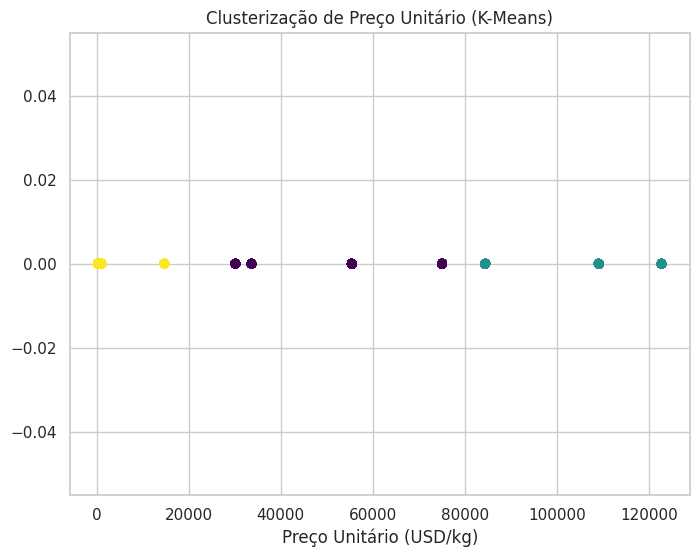

cluster
0     52133.707858
1    105141.269173
2      2457.921454
Name: preco_unitario_usd_kg, dtype: float64


In [34]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Selecionar variável
X = df_filtrado[['preco_unitario_usd_kg']]

#
kmeans = KMeans(n_clusters=3, random_state=42)
df_filtrado['cluster'] = kmeans.fit_predict(X)

# Visualizar clusters
plt.figure(figsize=(8,6))
plt.scatter(df_filtrado['preco_unitario_usd_kg'], [0]*len(df_filtrado),
            c=df_filtrado['cluster'], cmap='viridis', alpha=0.6)
plt.xlabel("Preço Unitário (USD/kg)")
plt.title("Clusterização de Preço Unitário (K-Means)")
plt.show()

# Ver médias por cluster
print(df_filtrado.groupby('cluster')['preco_unitario_usd_kg'].mean())

In [35]:
from sklearn.linear_model import LinearRegression

# Variáveis independentes
X = df_filtrado[['peso_liquido_kg', 'valor_frete', 'valor_seguro']]
y = df_filtrado['preco_unitario_usd_kg']

# Modelo
reg = LinearRegression()
reg.fit(X, y)

# Coeficientes
print("Coeficientes:", reg.coef_)
print("Intercepto:", reg.intercept_)
print("R²:", reg.score(X, y))

Coeficientes: [-6714.34675859    27.04440564   344.960786  ]
Intercepto: 31860.973642168225
R²: 0.5367532412843021


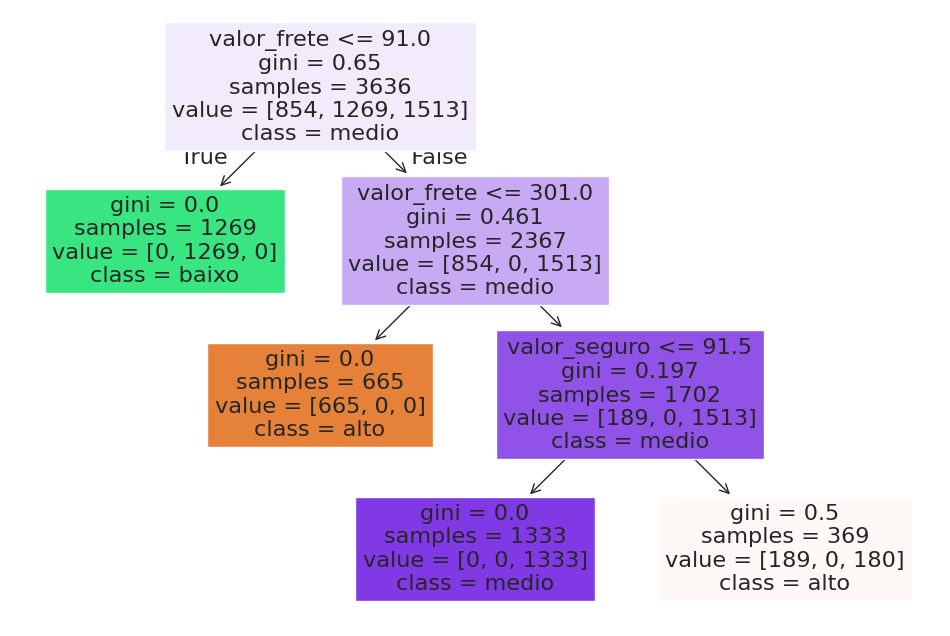

In [36]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
import numpy as np

# Criar categorias de preço (baixo, médio, alto)
df_filtrado['faixa_preco'] = pd.qcut(df_filtrado['preco_unitario_usd_kg'],
                                     q=3, labels=['baixo','medio','alto'])

# Variáveis independentes
X = df_filtrado[['peso_liquido_kg', 'valor_frete', 'valor_seguro']]
y = df_filtrado['faixa_preco']

# Modelo
tree = DecisionTreeClassifier(max_depth=3, random_state=42)
tree.fit(X, y)

# Visualizar árvore
plt.figure(figsize=(12,8))
plot_tree(tree, feature_names=X.columns, class_names=tree.classes_, filled=True)
plt.show()

In [37]:
#O Brasil passou a importar de países diferentes em 2020 comparado a 2019 devido ao fechamento de fronteiras?

In [38]:
df_2019 = df_import[df_import['ano'] == 2019]
df_2020 = df_import[df_import['ano'] == 2020]

In [39]:
print(df_import.columns)

Index(['ano', 'mes', 'id_sh4', 'id_pais', 'sigla_pais_iso3', 'sigla_uf',
       'id_municipio', 'ID_VIA', 'id_urf', 'quantidade_estatistica',
       'peso_liquido_kg', 'valor_fob_dolar', 'valor_frete', 'valor_seguro',
       'preco_unitario_usd_kg', 'freq'],
      dtype='object')


In [40]:
paises_2019 = set(df_2019['sigla_pais_iso3'].unique())
paises_2020 = set(df_2020['sigla_pais_iso3'].unique())


In [41]:
paises_perdidos = paises_2019 - paises_2020
paises_novos = paises_2020 - paises_2019


print("Países que deixaram de aparecer em 2020:", paises_perdidos)
print("Países novos em 2020:", paises_novos)


Países que deixaram de aparecer em 2020: {'HKG', 'DEU', 'BRA'}
Países novos em 2020: set()


In [42]:
comparacao_paises = pd.DataFrame({
    'Presente_2019': [pais in paises_2019 for pais in sorted(paises_2019.union(paises_2020))],
    'Presente_2020': [pais in paises_2020 for pais in sorted(paises_2019.union(paises_2020))]
}, index=sorted(paises_2019.union(paises_2020)))

comparacao_paises

,Presente_2019,Presente_2020
BRA,True,False
DEU,True,False
HKG,True,False
IND,True,True
USA,True,True


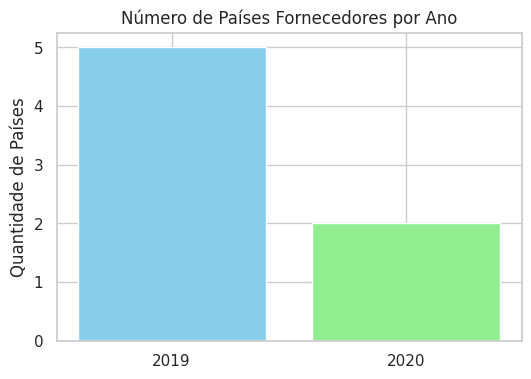

In [43]:
num_paises_2019 = len(paises_2019)
num_paises_2020 = len(paises_2020)

plt.figure(figsize=(6,4))
plt.bar(['2019', '2020'], [num_paises_2019, num_paises_2020], color=['skyblue','lightgreen'])
plt.title("Número de Países Fornecedores por Ano")
plt.ylabel("Quantidade de Países")
plt.show()